**분석 주제: 범죄위험도 분류 모델  **  
종속변수: 범죄위험도  
독립변수: 전체 외국인수, 남자 외국인수, 여자 외국인수, 전체 평균연령, 남자 평균연령, 여자 평균연령, cctv 개수, 안전비상벨 개수, 노후 주거용 건축물, 노후 상업용 건축물, 노후 공업용 건축물, 노후 공공용 건축물, 노후 문교사회용 건축물, 1인 가구 비율

In [ ]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 7.6 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [ ]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 6.6 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=982ebf1563905a23ab02a5fa41b21187ebd0b8ba229ad37eb68b54b4f0854316
  Stored in directory: /root/.cache/pip/wheels/87/75/37/404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [ ]:
import mglearn

In [ ]:
#폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,383 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
#한글 폰트 적용
import matplotlib as mpl
import matplotlib.pyplot as plt 

plt.rc('font', family='NanumBarunGothic')
mpl.rcParams['axes.unicode_minus'] = False

#파일 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns      

In [ ]:
secure = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IT와 비즈니스 혁신/data/secure.csv")

display(secure.head())

,시점,자치구,발생 소계,살인 발생,강도 발생,강간·강제추행 발생,절도 발생,폭력 발생,전체 가구수,1인 가구수,...,전체 평균연령,남자 평균연령,여자 평균연령,cctv 개수,안전비상벨 개수,노후 주거용 건축물,노후 상업용 건축물,노후 공업용 건축물,노후 공공용 건축물,노후 문교사회용 건축물
0,2014,소계,130674,158,343,5462,59393,65318,NaN,NaN,...,40.2,39.3,41.0,"4,011",8346,NaN,NaN,NaN,NaN,NaN
1,2014,종로구,5021,3,12,226,2272,2508,NaN,NaN,...,42.5,41.5,43.4,120,2,NaN,NaN,NaN,NaN,NaN
2,2014,중구,5231,6,13,221,2576,2415,NaN,NaN,...,42.9,42.0,43.8,77,120,NaN,NaN,NaN,NaN,NaN
3,2014,용산구,3799,1,7,213,1560,2018,NaN,NaN,...,41.8,40.8,42.8,125,595,NaN,NaN,NaN,NaN,NaN
4,2014,성동구,3582,1,5,141,1753,1682,NaN,NaN,...,40.5,39.7,41.2,111,182,NaN,NaN,NaN,NaN,NaN


#데이터 전처리

In [ ]:
display(secure.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   시점            208 non-null    int64  
 1   자치구           208 non-null    object 
 2   발생 소계         208 non-null    int64  
 3   살인 발생         208 non-null    object 
 4   강도 발생         208 non-null    int64  
 5   강간·강제추행 발생    208 non-null    int64  
 6   절도 발생         208 non-null    int64  
 7   폭력 발생         208 non-null    int64  
 8   전체 가구수        182 non-null    float64
 9   1인 가구수        182 non-null    float64
 10  전체 외국인수       208 non-null    int64  
 11  남자 외국인수       208 non-null    int64  
 12  여자 외국인수       208 non-null    int64  
 13  전체 평균연령       208 non-null    float64
 14  남자 평균연령       208 non-null    float64
 15  여자 평균연령       208 non-null    float64
 16  cctv 개수       208 non-null    object 
 17  안전비상벨 개수      208 non-null    int64  
 18  노후 주거용 건축물    175 non-null    

None

In [ ]:
secure = secure.dropna(axis=0)
print("결측행 모두 제거: ", secure.shape)

결측행 모두 제거:  (175, 23)


In [ ]:
display(secure.isna().sum())

시점              0
자치구             0
발생 소계           0
살인 발생           0
강도 발생           0
강간·강제추행 발생      0
절도 발생           0
폭력 발생           0
전체 가구수          0
1인 가구수          0
전체 외국인수         0
남자 외국인수         0
여자 외국인수         0
전체 평균연령         0
남자 평균연령         0
여자 평균연령         0
cctv 개수         0
안전비상벨 개수        0
노후 주거용 건축물      0
노후 상업용 건축물      0
노후 공업용 건축물      0
노후 공공용 건축물      0
노후 문교사회용 건축물    0
dtype: int64

In [ ]:
secure['cctv 개수'] = pd.to_numeric(secure['cctv 개수'])

cctv 개수가 범주형으로 되어있어 연속형 변수로 변환

In [ ]:
secure['1인 가구 비율'] = 0
secure['1인 가구 비율'] = secure['1인 가구수'] / secure['전체 가구수'] * 100
secure

,시점,자치구,발생 소계,살인 발생,강도 발생,강간·강제추행 발생,절도 발생,폭력 발생,전체 가구수,1인 가구수,...,남자 평균연령,여자 평균연령,cctv 개수,안전비상벨 개수,노후 주거용 건축물,노후 상업용 건축물,노후 공업용 건축물,노후 공공용 건축물,노후 문교사회용 건축물,1인 가구 비율
27,2015,종로구,4705,6,11,211,2184,2293,61580.0,22776.0,...,42.0,43.8,161,2,6107.0,3300.0,38.0,14.0,270.0,36.986034
28,2015,중구,4954,3,9,170,2548,2224,51205.0,19161.0,...,42.5,44.3,236,173,4825.0,5342.0,138.0,10.0,264.0,37.420174
29,2015,용산구,3820,5,14,194,1557,2050,90313.0,31025.0,...,41.2,43.3,221,709,11093.0,3150.0,88.0,25.0,227.0,34.352751
30,2015,성동구,3358,4,9,126,1607,1612,114719.0,35259.0,...,40.1,41.6,327,287,6263.0,2189.0,379.0,6.0,131.0,30.735101
31,2015,광진구,5909,4,14,240,3026,2625,147718.0,54210.0,...,39.3,40.7,95,0,5919.0,1565.0,16.0,9.0,172.0,36.698304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,2021,관악구,4444,8,7,321,1860,2248,252619.0,136255.0,...,42.2,43.7,538,988,11522.0,2523.0,3.0,88.0,258.0,53.936956
204,2021,서초구,3656,9,5,312,1503,1827,155936.0,45933.0,...,41.1,42.3,365,34,4009.0,2938.0,5.0,13.0,181.0,29.456315
205,2021,강남구,6146,12,25,578,2372,3159,211168.0,71986.0,...,41.2,42.5,516,2773,3739.0,4498.0,0.0,7.0,319.0,34.089445
206,2021,송파구,4714,3,7,247,2024,2433,259378.0,79262.0,...,41.6,42.8,144,880,6680.0,2640.0,1.0,32.0,293.0,30.558490


In [ ]:
secure.describe()

,시점,발생 소계,강도 발생,강간·강제추행 발생,절도 발생,폭력 발생,전체 가구수,1인 가구수,전체 외국인수,남자 외국인수,...,남자 평균연령,여자 평균연령,cctv 개수,안전비상벨 개수,노후 주거용 건축물,노후 상업용 건축물,노후 공업용 건축물,노후 공공용 건축물,노후 문교사회용 건축물,1인 가구 비율
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,...,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,2018.000000,4176.085714,7.120000,239.822857,1694.451429,2228.994286,155129.708571,50542.548571,10574.874286,5029.714286,...,41.549143,43.261714,403.634286,649.097143,7450.805714,2424.382857,63.262857,15.737143,190.714286,33.006613
std,2.005739,1277.523965,5.088007,120.117794,583.584077,654.270898,48410.982628,19279.939598,7892.443773,4430.076881,...,1.556443,1.620830,256.492887,542.604380,2937.285731,1084.599744,92.976326,12.013859,60.524039,6.441009
min,2015.000000,1860.000000,1.000000,72.000000,633.000000,1012.000000,51205.000000,19161.000000,1999.000000,734.000000,...,38.300000,39.700000,5.000000,0.000000,2590.000000,770.000000,0.000000,0.000000,69.000000,20.041142
25%,2016.000000,3279.000000,3.000000,159.000000,1271.000000,1700.500000,126751.500000,39074.500000,4473.500000,1976.000000,...,40.500000,42.050000,215.500000,139.500000,4990.500000,1673.000000,10.000000,7.000000,143.000000,28.202555
50%,2018.000000,4014.000000,6.000000,197.000000,1590.000000,2156.000000,156235.000000,48888.000000,8884.000000,3815.000000,...,41.500000,43.200000,356.000000,659.000000,6913.000000,2184.000000,18.000000,13.000000,183.000000,33.180759
75%,2020.000000,4939.000000,9.000000,287.500000,2022.500000,2643.500000,179208.000000,58183.000000,14128.500000,5832.500000,...,42.600000,44.400000,528.500000,880.000000,9418.500000,2998.500000,71.000000,24.000000,235.000000,37.439803
max,2021.000000,8617.000000,39.000000,708.000000,3850.000000,4284.000000,259378.000000,136255.000000,39307.000000,20994.000000,...,45.600000,47.800000,1293.000000,2773.000000,15081.000000,5653.000000,379.000000,88.000000,328.000000,53.936956


범죄 발생 건수의 평균을 기준으로 범죄위험도를 나눔.  
범죄 발생 건수 평균 = 4176.085714 -> 4176

In [ ]:
secure['범죄위험도'] = 0
secure.loc[(secure['발생 소계'] > 4176), '범죄위험도'] = '높음'
secure.loc[(secure['발생 소계'] <= 4176), '범죄위험도'] = '낮음'
secure.head(5)

,시점,자치구,발생 소계,살인 발생,강도 발생,강간·강제추행 발생,절도 발생,폭력 발생,전체 가구수,1인 가구수,...,여자 평균연령,cctv 개수,안전비상벨 개수,노후 주거용 건축물,노후 상업용 건축물,노후 공업용 건축물,노후 공공용 건축물,노후 문교사회용 건축물,1인 가구 비율,범죄위험도
27,2015,종로구,4705,6,11,211,2184,2293,61580.0,22776.0,...,43.8,161,2,6107.0,3300.0,38.0,14.0,270.0,36.986034,높음
28,2015,중구,4954,3,9,170,2548,2224,51205.0,19161.0,...,44.3,236,173,4825.0,5342.0,138.0,10.0,264.0,37.420174,높음
29,2015,용산구,3820,5,14,194,1557,2050,90313.0,31025.0,...,43.3,221,709,11093.0,3150.0,88.0,25.0,227.0,34.352751,낮음
30,2015,성동구,3358,4,9,126,1607,1612,114719.0,35259.0,...,41.6,327,287,6263.0,2189.0,379.0,6.0,131.0,30.735101,낮음
31,2015,광진구,5909,4,14,240,3026,2625,147718.0,54210.0,...,40.7,95,0,5919.0,1565.0,16.0,9.0,172.0,36.698304,높음


낮음    98
높음    77
Name: 범죄위험도, dtype: int64


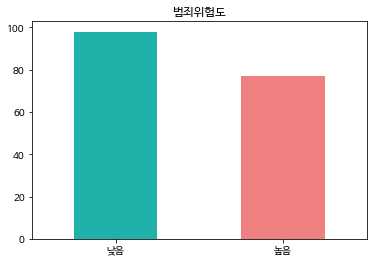

In [ ]:
print(secure['범죄위험도'].value_counts())

colors = ['lightseagreen', 'lightcoral']

secure['범죄위험도'].value_counts().plot.bar(color = colors)
plt.xticks(rotation=0)
plt.title('범죄위험도')
plt.show()

낮음    98
높음    77
Name: 범죄위험도, dtype: int64


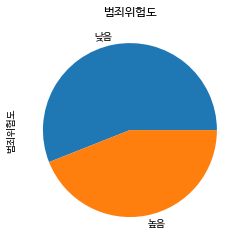

In [ ]:
print(secure['범죄위험도'].value_counts())

secure['범죄위험도'].value_counts().plot.pie()
plt.ylabel('범죄위험도')
plt.title('범죄위험도')
plt.show()

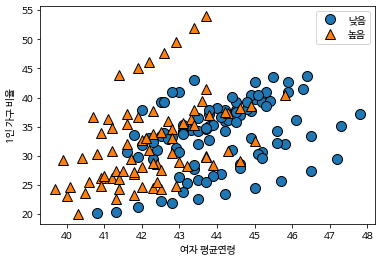

In [ ]:
mglearn.discrete_scatter(secure['여자 평균연령'], secure['1인 가구 비율'], secure['범죄위험도'])
plt.xlabel("여자 평균연령")
plt.ylabel("1인 가구 비율")
plt.legend()
plt.show()

여자 평균연령이 낮을수록 범죄위험도가 높음  
1인 가구 비율의 경우, 일정 수준 이상이 되면 범죄위험도가 높음

Text(0.5, 1.0, '년도별 안전비상벨 개수')

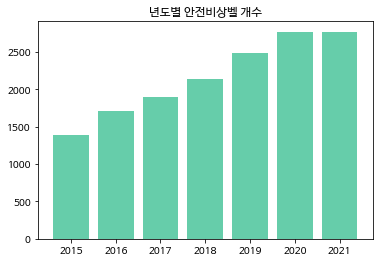

In [ ]:
plt.bar(secure['시점'], secure['안전비상벨 개수'], color = 'mediumaquamarine')
plt.title('년도별 안전비상벨 개수')

Text(0.5, 1.0, '년도별 범죄 발생 수치')

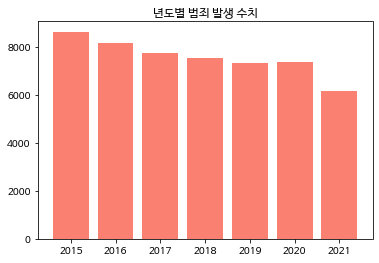

In [ ]:
plt.bar(secure['시점'], secure['발생 소계'], color = 'salmon')
plt.title('년도별 범죄 발생 수치')

#의사결정 나무

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = secure.iloc[:, 10:24]
y = secure['범죄위험도']

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.682


In [ ]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.901
시험용 데이터 정확도: 0.636


In [ ]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.954
시험용 데이터 정확도: 0.682


In [ ]:
tree = DecisionTreeClassifier(max_depth=6, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.992
시험용 데이터 정확도: 0.682


max_depth = 5 이상은 시험용 데이터의 정확도가 같아서 max_depth를 따로 설정하지 않은 것으로 의사결정나무를 시각화함.

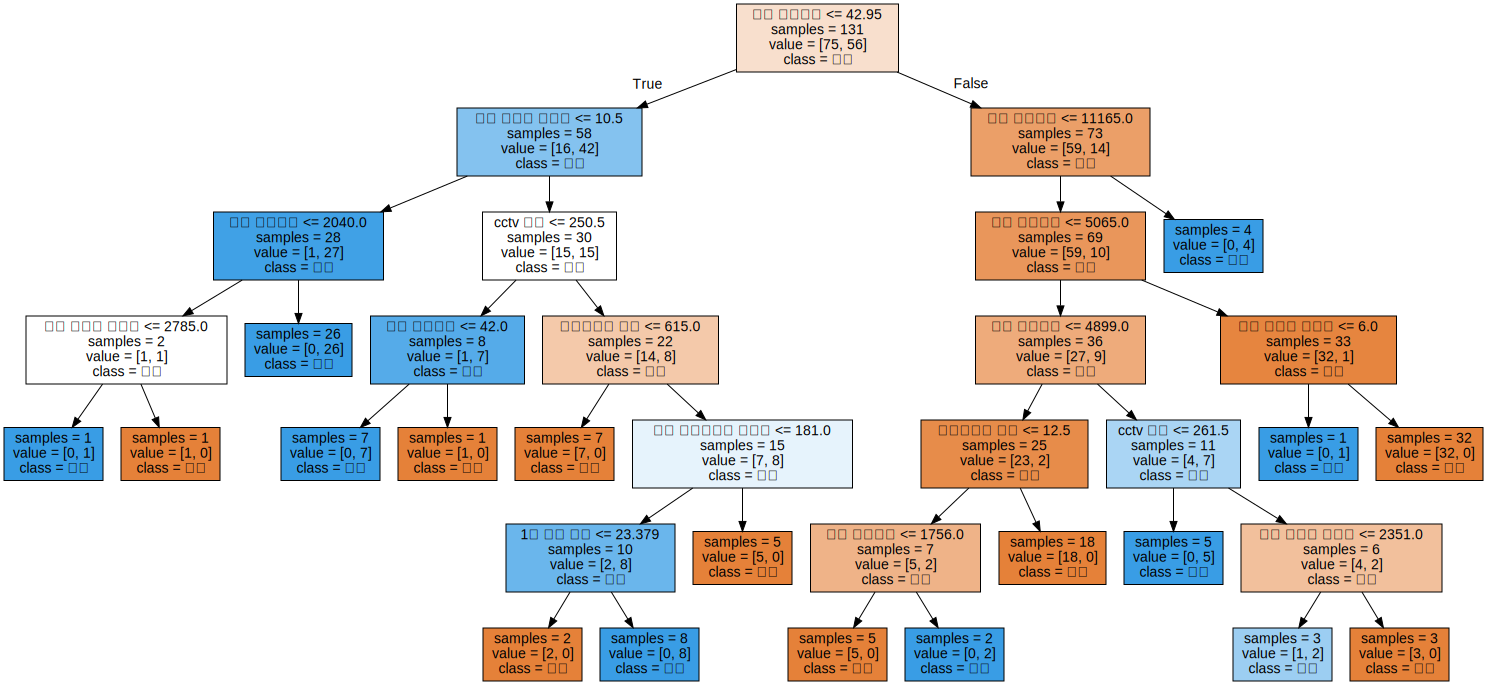

In [ ]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "높음", "낮음"],
                feature_names=secure.columns[10:24], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

##그리드 서치

In [ ]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3,4,5], 'min_samples_split':[2,3,4]}

In [ ]:
# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_dt = DecisionTreeClassifier(random_state=0)
grid_dt = GridSearchCV(init_dt, param_grid=parameters, cv=3, refit=True)
print(grid_dt)
# 파라미터들을 순차적으로 학습, 검증
grid_dt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.671600,13,0.636364,0.727273,0.651163
1,"{'max_depth': 1, 'min_samples_split': 3}",0.671600,13,0.636364,0.727273,0.651163
2,"{'max_depth': 1, 'min_samples_split': 4}",0.671600,13,0.636364,0.727273,0.651163
3,"{'max_depth': 2, 'min_samples_split': 2}",0.709655,10,0.704545,0.750000,0.674419
4,"{'max_depth': 2, 'min_samples_split': 3}",0.709655,10,0.704545,0.750000,0.674419
5,"{'max_depth': 2, 'min_samples_split': 4}",0.709655,10,0.704545,0.750000,0.674419
6,"{'max_depth': 3, 'min_samples_split': 2}",0.724806,5,0.772727,0.727273,0.674419
7,"{'max_depth': 3, 'min_samples_split': 3}",0.724806,5,0.772727,0.727273,0.674419
8,"{'max_depth': 3, 'min_samples_split': 4}",0.724806,5,0.772727,0.727273,0.674419
9,"{'max_depth': 4, 'min_samples_split': 2}",0.732206,4,0.772727,0.772727,0.651163


In [ ]:
print('GridSearchCV 최적 파라미터:', grid_dt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dt.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7708


In [ ]:
# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_dt.score(X_test, y_test)))

시험용 데이터 세트 정확도: 0.682


#랜덤 포레스트

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


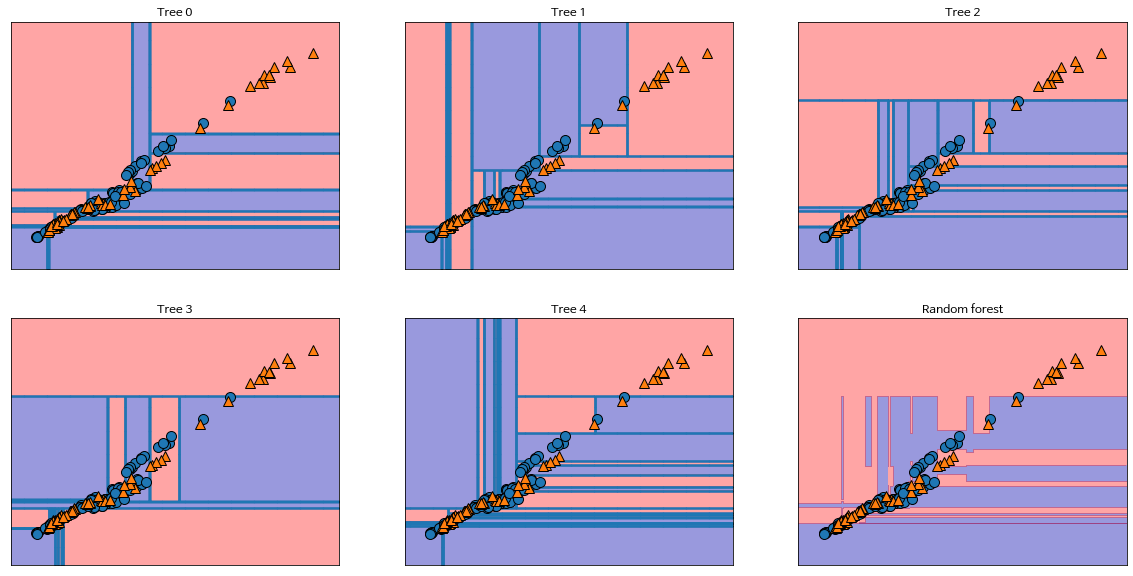

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# radius_mean, texture_mean 변수만 이용하여 
forest = RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train.iloc[:, 0:2], y_train)

# 5개 나무 각각의 분류 경계를 그림 (서로 모양이 많이 다르다)
# 2차원으로 나무의 결과를 보여주기 위한 코드로 mglearn의 함수들을 이용 - 여기서는 설명 생략
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X.iloc[:, 0:2].values, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X.iloc[:, 0:2].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

In [ ]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.909


##그리드 서치

In [ ]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'n_estimators': range(5, 50, 10), 'max_features': range(1,5), 'max_depth':range(1,5)}

In [ ]:
# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_rf = RandomForestClassifier(random_state=2)
grid_rf = GridSearchCV(estimator=init_rf, param_grid=parameters, cv=3, refit=True)
print(grid_rf)
# 파라미터들을 순차적으로 학습, 검증
grid_rf.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_rf.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=2),
             param_grid={'max_depth': range(1, 5), 'max_features': range(1, 5),
                         'n_estimators': range(5, 50, 10)})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'max_features': 1, 'n_estimat...",0.664200,80,0.659091,0.659091,0.674419
1,"{'max_depth': 1, 'max_features': 1, 'n_estimat...",0.702255,67,0.659091,0.750000,0.697674
2,"{'max_depth': 1, 'max_features': 1, 'n_estimat...",0.732911,37,0.681818,0.772727,0.744186
3,"{'max_depth': 1, 'max_features': 1, 'n_estimat...",0.709831,60,0.681818,0.750000,0.697674
4,"{'max_depth': 1, 'max_features': 1, 'n_estimat...",0.702431,65,0.659091,0.727273,0.720930
...,...,...,...,...,...,...
75,"{'max_depth': 4, 'max_features': 4, 'n_estimat...",0.702079,68,0.681818,0.750000,0.674419
76,"{'max_depth': 4, 'max_features': 4, 'n_estimat...",0.732911,37,0.659091,0.795455,0.744186
77,"{'max_depth': 4, 'max_features': 4, 'n_estimat...",0.755462,12,0.750000,0.795455,0.720930
78,"{'max_depth': 4, 'max_features': 4, 'n_estimat...",0.724982,49,0.727273,0.750000,0.697674


In [ ]:
print('GridSearchCV 최적 파라미터:', grid_rf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_rf.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 4, 'max_features': 3, 'n_estimators': 45}
GridSearchCV 최고 정확도: 0.7939


In [ ]:
# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_rf.score(X_test, y_test)))

시험용 데이터 세트 정확도: 0.864


#랜덤 포레스트와 단일 의사결정나무 비교

In [ ]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(init_dt, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(init_rf, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

Accuracy
Decision tree:  [0.78571429 0.69230769 1.         0.69230769 0.76923077 0.69230769
 0.76923077 0.61538462 0.92307692 0.84615385]
Random forest:  [0.71428571 0.84615385 0.84615385 0.69230769 0.92307692 0.84615385
 0.92307692 0.92307692 0.84615385 0.84615385]
Accuracy mean
Decision tree :0.779
Random forest :0.841


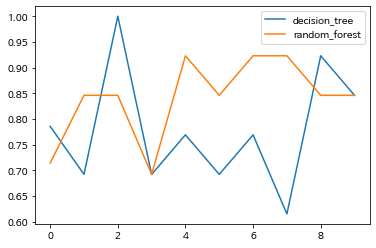

In [ ]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

랜덤 포레스트의 정확도가 더 높다.

#그래디언트 부스팅

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.841


In [ ]:
#나무 깊이 제한
gbrt = GradientBoostingClassifier(random_state=0, max_depth=3)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.841


In [ ]:
#학습률 감소
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.916
시험용 데이터 세트 정확도: 0.795


In [ ]:
#나무 깊이 제한
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.864


나무 깊이를 2로 제한했을 때, 정확도가 가장 높게 나옴

##그리드 서치

In [ ]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [ ]:
# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.816949,5,0.795455,0.818182,0.837209
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.824348,3,0.818182,0.840909,0.813953
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.831924,2,0.818182,0.863636,0.813953
3,"{'learning_rate': 0.08, 'max_depth': 1}",0.794045,10,0.772727,0.795455,0.813953
4,"{'learning_rate': 0.08, 'max_depth': 2}",0.816420,8,0.818182,0.863636,0.767442
5,"{'learning_rate': 0.08, 'max_depth': 3}",0.816596,7,0.795455,0.863636,0.790698
6,"{'learning_rate': 0.06, 'max_depth': 1}",0.778717,12,0.772727,0.772727,0.790698
7,"{'learning_rate': 0.06, 'max_depth': 2}",0.847252,1,0.818182,0.886364,0.837209
8,"{'learning_rate': 0.06, 'max_depth': 3}",0.816772,6,0.772727,0.863636,0.813953
9,"{'learning_rate': 0.04, 'max_depth': 1}",0.755814,14,0.750000,0.750000,0.767442


In [ ]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.06, 'max_depth': 2}
GridSearchCV 최고 정확도: 0.8473


In [ ]:
# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

시험용 데이터 세트 정확도: 0.864


#분류 모델 평가

##교차 검증

In [ ]:
# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(init_dt, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(init_rf, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(init_gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.78571429 0.69230769 1.         0.69230769 0.76923077 0.69230769
 0.76923077 0.61538462 0.92307692 0.84615385]
Random forest:  [0.71428571 0.84615385 0.84615385 0.69230769 0.92307692 0.84615385
 0.92307692 0.92307692 0.84615385 0.84615385]
Gradient boosting:  [0.78571429 0.76923077 0.84615385 0.76923077 0.92307692 0.92307692
 0.92307692 0.84615385 1.         0.69230769]
Accuracy mean
Decision tree :0.779
Random forest :0.841
Gradient boosting :0.848


In [ ]:
# 교차 검증 상세 옵션 지정

# KFold :기본값 n_splits=5, shuffle=None (데이터를 임의로 섞지 않음) 
# LeaveOneOut :데이터 1개를 검증에 이용 
# ShuffleSplit :임의 분할, 전체 데이터를 모두 사용하지 않을 수도 있음
# GroupKFold :그룹을 지정해서 같은 그룹의 데이터는 학습용 또는 검증용으로 동일하게 분할
# StratifiedKFold :각 fold마다 클래스의 분포가 동일하도록 분할 (예. 악성:양성) 
# RepeatedStratifiedKFold: 교차검증을 반복, 기본값 n_repeats =10

from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10)
#from sklearn.model_selection import RepeatedStratifiedKFold
#kf = RepeatedStratifiedKFold(n_splits=10)

print(kf)

dt_scores = cross_val_score(init_dt, X_train, y_train, cv=kf, scoring='accuracy')  
rf_scores = cross_val_score(init_rf, X_train, y_train, cv=kf, scoring='accuracy')
gbrt_scores = cross_val_score(init_gbrt, X_train, y_train, cv=kf, scoring='accuracy')

print("Accuracy mean -- StratifiedKFold 이용")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Accuracy mean -- StratifiedKFold 이용
Decision tree :0.779
Random forest :0.841
Gradient boosting :0.848


그래디언트 부스팅을 사용했을 때, 가장 높은 정확도가 나옴.

## 모델 평가 지표

* 정오 분류표(Confusion matrix)
* 정확도(accuracy), 민감도(sensitivity), 특이도(specificity), 정밀도(precistion), 재현률(recall), F1-measure
* ROC (Receiver Operator Characteristic) 곡선과 AUC (Aread Under the Curve)

### 정오 분류표 (Confusion matrix)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(y_test.value_counts())

dt_pred = grid_dt.predict(X_test)
rf_pred = grid_rf.predict(X_test)
grid_gbrt_pred = grid_gbrt.predict(X_test)

# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, grid_gbrt_pred)))
print(confusion_matrix(y_test, grid_gbrt_pred))

낮음    23
높음    21
Name: 범죄위험도, dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.682
[[17  6]
 [ 8 13]]
Random forest 시험용 데이터 세트 정확도:0.864
[[22  1]
 [ 5 16]]
Gradient boosting 시험용 데이터 세트 정확도:0.864
[[21  2]
 [ 4 17]]


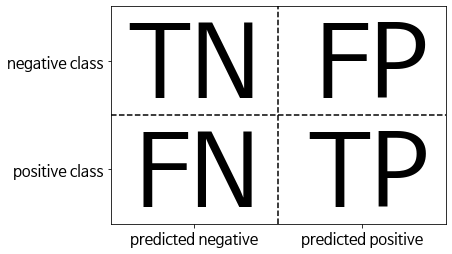

In [ ]:
mglearn.plots.plot_binary_confusion_matrix()

###의사결정 나무

In [ ]:
print('정밀도:{:.3f}'.format(precision_score (y_test, dt_pred, average='binary', pos_label="높음")))  # pos_label = 1 기본값
print('TP (13)) / TP+FP (21) = {:.3f}'.format(13/21))
print('재현율:{:.3f}'.format(recall_score(y_test, dt_pred, average='binary', pos_label="높음")))
print('TP (13) / TP+FN (21) = {:.3f}'.format(13/21))
print('f1-measure:{:.3f}'.format(f1_score(y_test, dt_pred, average='binary', pos_label="높음")))
print('2*(정밀도*재현율)/(정밀도+재현율) = {:.3f}'.format(0.684*0.619/(0.684+0.619)))

정밀도:0.684
TP (13)) / TP+FP (21) = 0.619
재현율:0.619
TP (13) / TP+FN (21) = 0.619
f1-measure:0.650
2*(정밀도*재현율)/(정밀도+재현율) = 0.325


###랜덤 포레스트

In [ ]:
print('정밀도:{:.3f}'.format(precision_score (y_test, rf_pred, average='binary', pos_label="높음")))  # pos_label = 1 기본값
print('TP (16) / TP+FP (21) = {:.3f}'.format(16/21))
print('재현율:{:.3f}'.format(recall_score(y_test, rf_pred, average='binary', pos_label="높음")))
print('TP (16) / TP+FN (21) = {:.3f}'.format(16/21))
print('f1-measure:{:.3f}'.format(f1_score(y_test, rf_pred, average='binary', pos_label="높음")))
print('2*(정밀도*재현율)/(정밀도+재현율) = {:.3f}'.format(2*0.941*0.762/(0.941+0.762)))

정밀도:0.941
TP (16) / TP+FP (21) = 0.762
재현율:0.762
TP (16) / TP+FN (21) = 0.762
f1-measure:0.842
2*(정밀도*재현율)/(정밀도+재현율) = 0.842


###그래디언트 부스팅

In [ ]:
print('정밀도:{:.3f}'.format(precision_score (y_test, grid_gbrt_pred, average='binary', pos_label="높음")))  # pos_label = 1 기본값
print('TP (17) / TP+FP (21) = {:.3f}'.format(17/21))
print('재현율:{:.3f}'.format(recall_score(y_test, grid_gbrt_pred, average='binary', pos_label="높음")))
print('TP (17) / TP+FN (21) = {:.3f}'.format(17/21))
print('f1-measure:{:.3f}'.format(f1_score(y_test, grid_gbrt_pred, average='binary', pos_label="높음")))
print('2*(정밀도*재현율)/(정밀도+재현율) = {:.3f}'.format(2*0.895*0.810/(0.895+0.810)))

정밀도:0.895
TP (17) / TP+FP (21) = 0.810
재현율:0.810
TP (17) / TP+FN (21) = 0.810
f1-measure:0.850
2*(정밀도*재현율)/(정밀도+재현율) = 0.850


시험 데이터로 검증해 보았을 때도, 정확도, 정밀도, 재현율 모두 그래디언트 부스팅에서 가장 높은 수치를 보인다.

#변수 중요도

##의사결정 나무

In [ ]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.0737513  0.         0.17118047 0.02729167 0.         0.28569832
 0.08565566 0.05517609 0.         0.03638889 0.09737421 0.03024531
 0.08733333 0.04990476]


In [ ]:
columns = secure[['남자 외국인수', '남자 평균연령', '노후 주거용 건축물', '전체 평균연령', '노후 공공용 건축물','노후 상업용 건축물','1인 가구 비율', '안전비상벨 개수', '전체 외국인수', 'cctv 개수', '노후 문교사회용 건축물', 
'노후 공업용 건축물', '여자 외국인수', '여자 평균연령']]

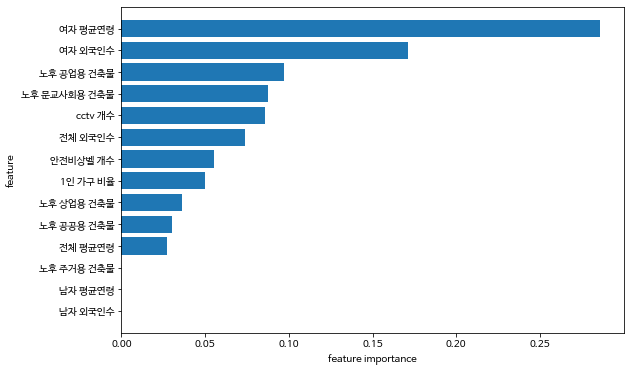

In [ ]:
import numpy as np

def plot_feature_importances_secure(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(columns.columns) 
    plt.barh(np.arange(n_features), sorted(model.feature_importances_), align='center') 
    plt.yticks(np.arange(n_features), columns.columns)
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_secure(tree)

In [ ]:
res = pd.DataFrame(result)
res["name"] = secure.columns[10:24]
display(res.info())

display(res.sort_values(by='name'))  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       14 non-null     float64
 1   name    14 non-null     object 
dtypes: float64(1), object(1)
memory usage: 352.0+ bytes


None

,0,name
13,0.049905,1인 가구 비율
6,0.085656,cctv 개수
1,0.000000,남자 외국인수
4,0.000000,남자 평균연령
11,0.030245,노후 공공용 건축물
10,0.097374,노후 공업용 건축물
12,0.087333,노후 문교사회용 건축물
9,0.036389,노후 상업용 건축물
8,0.000000,노후 주거용 건축물
7,0.055176,안전비상벨 개수


##랜덤 포레스트

In [ ]:
result = forest.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.06894747 0.07195633 0.07011125 0.12234372 0.07939274 0.11808527
 0.04047629 0.04331519 0.06766561 0.05272133 0.11826892 0.03902152
 0.05178784 0.05590652]


In [ ]:
columns = secure[['노후 공공용 건축물','cctv 개수','안전비상벨 개수','노후 문교사회용 건축물','노후 상업용 건축물','1인 가구 비율','노후 주거용 건축물','전체 외국인수','여자 외국인수','남자 외국인수','남자 평균연령','여자 평균연령','노후 공업용 건축물','전체 평균연령']]

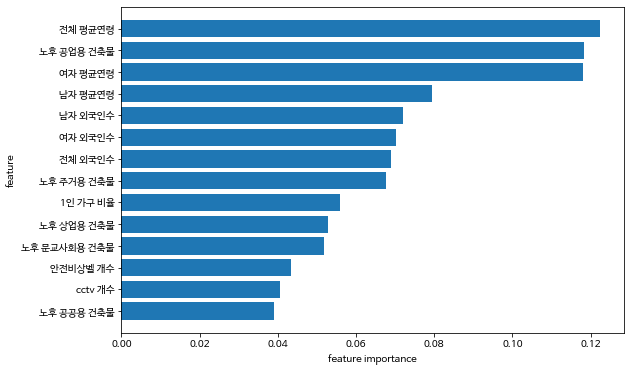

In [ ]:
plot_feature_importances_secure(forest)

##그래디언트 부스팅

In [ ]:
columns = secure[['노후 공공용 건축물','남자 평균연령','남자 외국인수','안전비상벨 개수','전체 외국인수','노후 상업용 건축물','1인 가구 비율','노후 주거용 건축물','cctv 개수','전체 평균연령','노후 문교사회용 건축물','여자 외국인수','노후 공업용 건축물','여자 평균연령']]

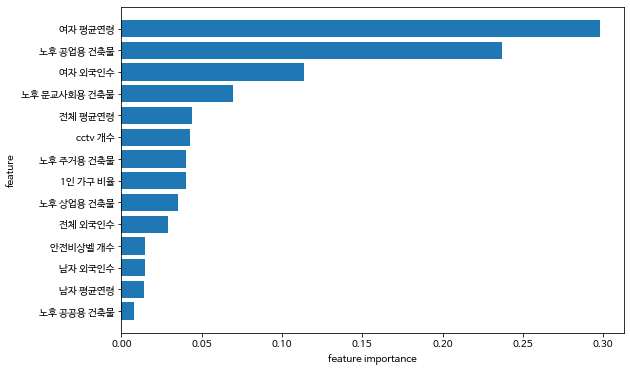

In [ ]:
plot_feature_importances_secure(gbrt)

각 분류 모델마다 약간의 차이는 있지만, 공통적으로 여자 평균연령, 노후 공업용 건축물, 여자 외국인수가 높은 중요도를 보이고 있다.

#인사이트 시각화

의사결정 나무에 따르면 거주하는 여성평균연령이 낮을수록 높은 범죄위험도를 보였습니다. 게다가 여성평균연령이 전반적으로 모든 모델에서 가장 중요한 변수로 사용되었습니다. 즉, 강력범죄에 취약한 어린 여성이 피해자가 될 가능성이 높고, 20~30대 여성의 경우 독립하여 1인 가구인 경우가 많기 때문에 범죄에 더 많이 노출될 수 있다는 것입니다. 하지만 그에 비해 1인 가구 비율이 높은 관악구의 cctv와 안전비상벨 설치 개수는 미미한 것을 알 수 있습니다.  
이에 대한 대책으로 여성 안전 귀갓길을 확대하고, 관악구와 같이 1인 가구 비율이 높은 지역에 cctv와 안전비상벨 설치 확대를 생각해 보았습니다.

Text(0.5, 1.0, '자치구별 범죄 발생 현황')

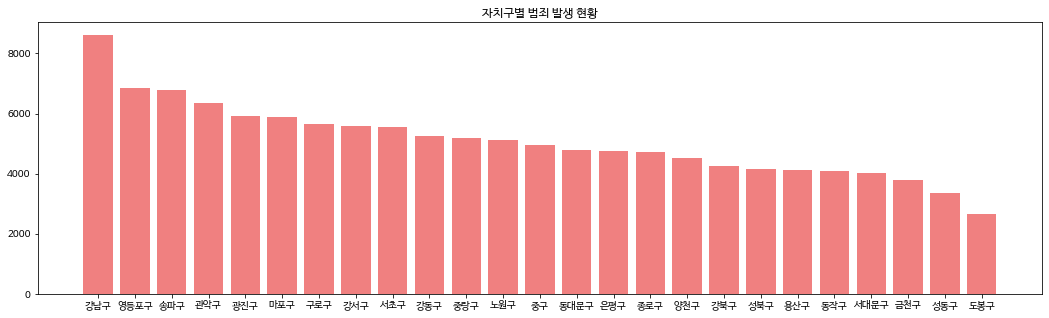

In [ ]:
plt.figure(figsize=(18, 5))

secure_state = secure.sort_values(by = '발생 소계', ascending = False)
plt.bar(secure_state['자치구'], secure_state['발생 소계'], color = 'lightcoral')
plt.title('자치구별 범죄 발생 현황')

Text(0.5, 1.0, '자치구별 1인 가구 비율')

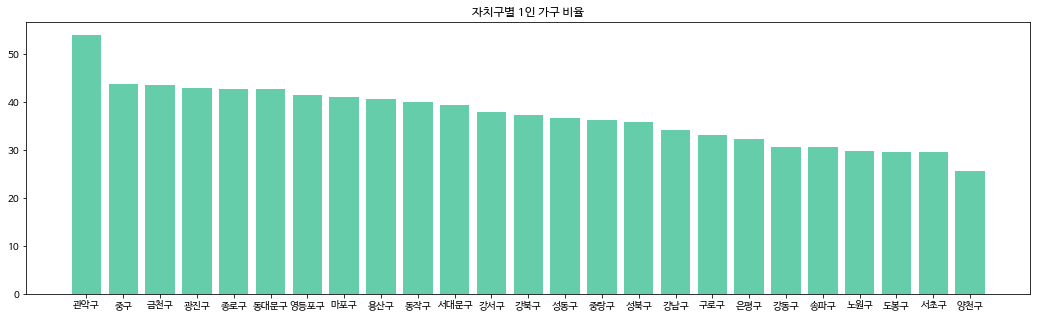

In [ ]:
plt.figure(figsize=(18, 5))

secure_state = secure.sort_values(by = '1인 가구 비율', ascending = False)
plt.bar(secure_state['자치구'], secure_state['1인 가구 비율'], color = 'mediumaquamarine')
plt.title('자치구별 1인 가구 비율')

Text(0.5, 1.0, '자치구별 cctv 개수')

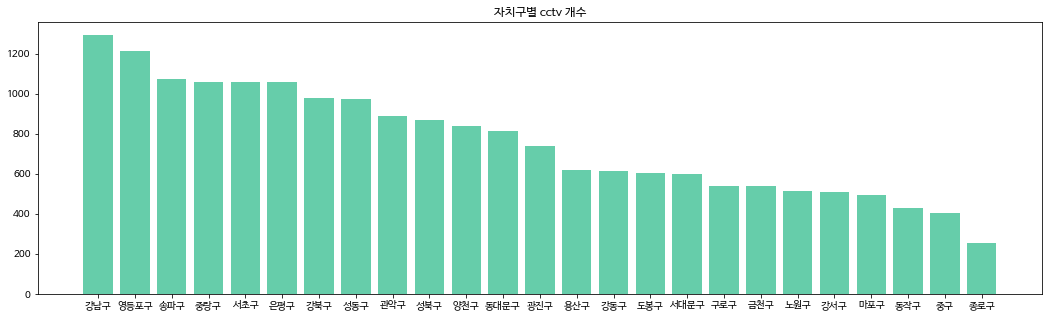

In [ ]:
plt.figure(figsize=(18, 5))

secure_state = secure.sort_values(by = 'cctv 개수', ascending = False)
plt.bar(secure_state['자치구'], secure_state['cctv 개수'], color = 'mediumaquamarine')
plt.title('자치구별 cctv 개수')

Text(0.5, 1.0, '자치구별 안전비상벨 개수')

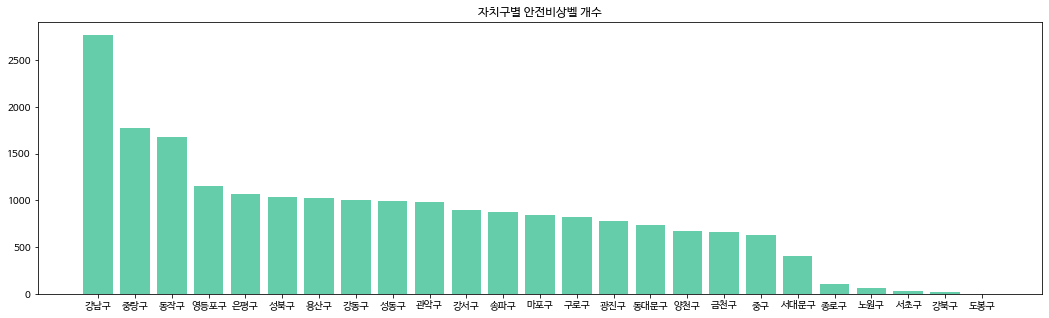

In [ ]:
plt.figure(figsize=(18, 5))

secure_state = secure.sort_values(by = '안전비상벨 개수', ascending = False)
plt.bar(secure_state['자치구'], secure_state['안전비상벨 개수'], color = 'mediumaquamarine')
plt.title('자치구별 안전비상벨 개수')

여성평균연령 다음으로 중요도가 높은 것은 건물 노후도와 관련된 변수로 나타났습니다. 즉, 공업용 건물의 경우 외진 곳에 있기 때문에 범죄가 일어나기 더 쉽고, 깨진 유리창 이론을 생각하면 특히 노후된 건물은 범죄를 저지르기 좋은 장소로 여겨질 수 있습니다.  
건물 노후도 관련 대책으로는 성동구, 금천구와 같이 특히 노후 공업용 건축물 개수가 많은 지자체 내의 지속적인 환경 정비, 범죄 위험이 큰 공업 단지 단속 강화 및 단지 주변 안전비상벨 설치 증원을 생각했습니다. 또한 범죄 예방을 위해 CPTED(환경설계를 통한 범죄예방) 등 범죄예방 환경조성 지원사업을 확대하고, 각 지역에 맞게 사업을 조정하려는 노력이 대책이 될 것이라 예상했습니다.

Text(0.5, 1.0, '자치구별 노후 공업용 건축물 개수')

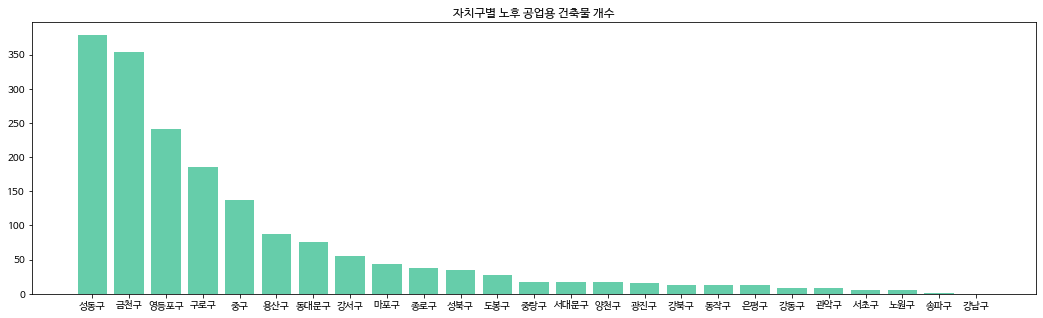

In [ ]:
plt.figure(figsize=(18, 5))

secure_state = secure.sort_values(by = '노후 공업용 건축물', ascending = False)
plt.bar(secure_state['자치구'], secure_state['노후 공업용 건축물'], color = 'mediumaquamarine')
plt.title('자치구별 노후 공업용 건축물 개수')

Text(0.5, 1.0, '자치구별 노후 주거용 건축물 개수')

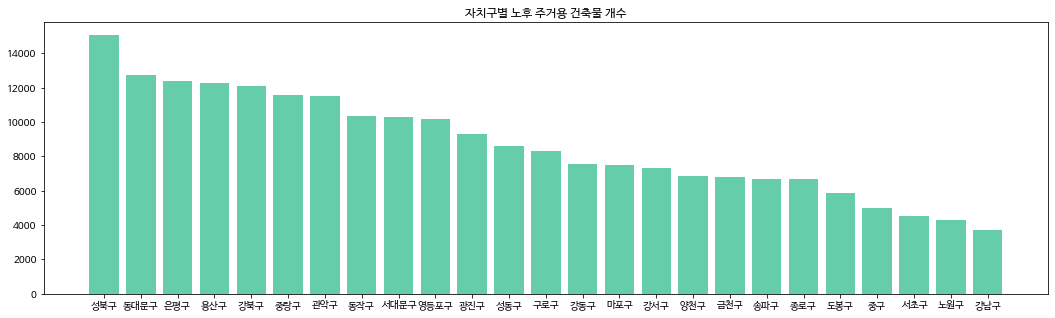

In [ ]:
plt.figure(figsize=(18, 5))

secure_state = secure.sort_values(by = '노후 주거용 건축물', ascending = False)
plt.bar(secure_state['자치구'], secure_state['노후 주거용 건축물'], color = 'mediumaquamarine')
plt.title('자치구별 노후 주거용 건축물 개수')

Text(0.5, 1.0, '자치구별 노후 상업용 건축물 개수')

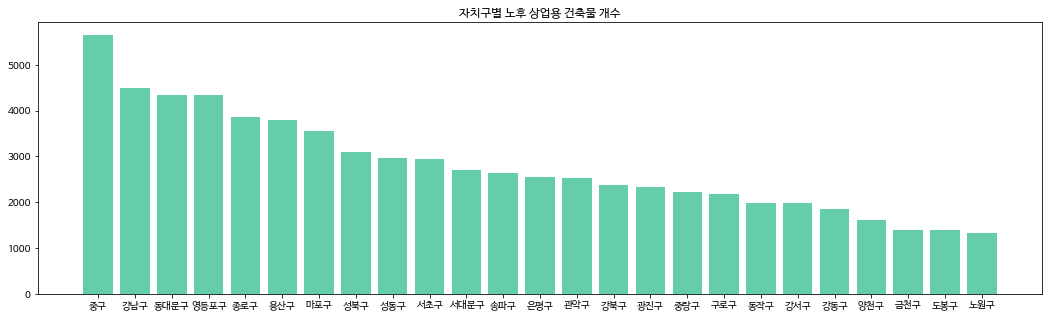

In [ ]:
plt.figure(figsize=(18, 5))

secure_state = secure.sort_values(by = '노후 상업용 건축물', ascending = False)
plt.bar(secure_state['자치구'], secure_state['노후 상업용 건축물'], color = 'mediumaquamarine')
plt.title('자치구별 노후 상업용 건축물 개수')

Text(0.5, 1.0, '자치구별 노후 공공용 건축물 개수')

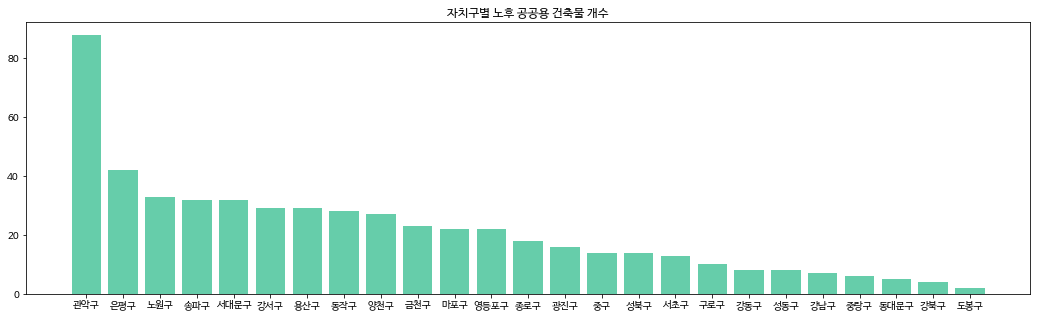

In [ ]:
plt.figure(figsize=(18, 5))

secure_state = secure.sort_values(by = '노후 공공용 건축물', ascending = False)
plt.bar(secure_state['자치구'], secure_state['노후 공공용 건축물'], color = 'mediumaquamarine')
plt.title('자치구별 노후 공공용 건축물 개수')

Text(0.5, 1.0, '자치구별 노후 문교사회용 건축물 개수')

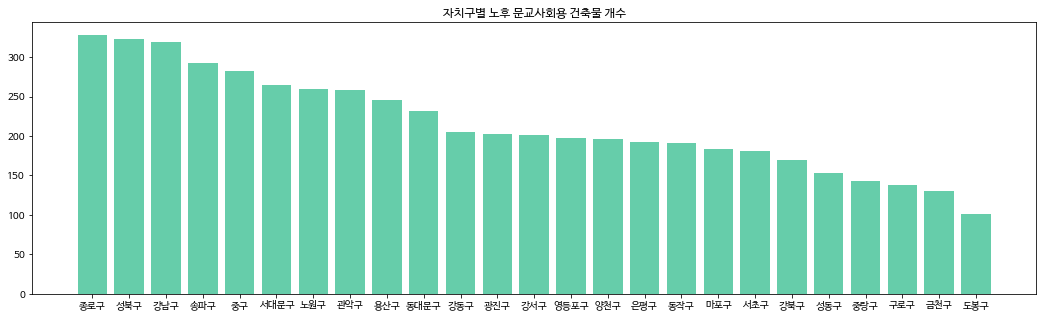

In [ ]:
plt.figure(figsize=(18, 5))

secure_state = secure.sort_values(by = '노후 문교사회용 건축물', ascending = False)
plt.bar(secure_state['자치구'], secure_state['노후 문교사회용 건축물'], color = 'mediumaquamarine')
plt.title('자치구별 노후 문교사회용 건축물 개수')

외국인 거주자 수 역시 중요도가 높았습니다. 즉, 외국인 역시 범죄의 피해자 혹은 가해자가 될 수 있고, 범죄위험도에 영향을 미칠 수 있다는 것입니다.  
외국인 거주자에 대한 대책으로는 지자체가 중심이 되어 막 이주해 온 외국인 거주자를 위한 법 관련 교육 시스템 마련, 한국에 거주하고 있는 외국인 여성을 위한 호신술 교육 실행, 영등포구와 구로구와 같이 외국인이 많이 거주하는 지자체에 대해 외국인 범죄 예방과 안전도 향상을 위한 특별치안활동 추진을 고안했습니다.

Text(0.5, 1.0, '자치구별 여자 외국인수')

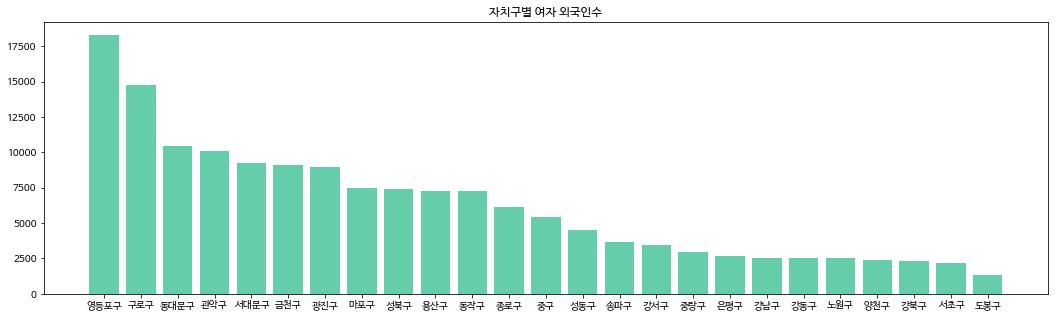

In [ ]:
plt.figure(figsize=(18, 5))

secure_state = secure.sort_values(by = '여자 외국인수', ascending = False)
plt.bar(secure_state['자치구'], secure_state['여자 외국인수'], color = 'mediumaquamarine')
plt.title('자치구별 여자 외국인수')

Text(0.5, 1.0, '자치구별 남자 외국인수')

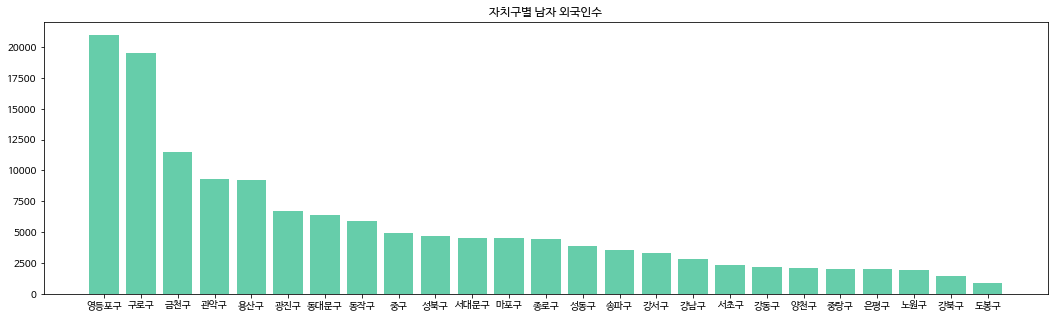

In [ ]:
plt.figure(figsize=(18, 5))

secure_state = secure.sort_values(by = '남자 외국인수', ascending = False)
plt.bar(secure_state['자치구'], secure_state['남자 외국인수'], color = 'mediumaquamarine')
plt.title('자치구별 남자 외국인수')